# Feature Engineering & Modeling

after EDA, we will be putting out data into model. We will first do the unsupervised learning then followed by supervised learning modeling. 


In [69]:
import pandas as pd
import time
import numpy as np
from sklearn.cluster import KMeans, k_means
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [6]:
df = pd.read_csv('../Data/yelp_dataset_final.csv')
df.drop('Index', 1, inplace=True)

### Feature Engineering

In [7]:
states_to_drop = ['NY','TX','CA','IN','VA','KY','CO','OR']
df = df[~df['STATE'].isin(states_to_drop)]
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df['target'].replace(5,4, inplace=True)

In [31]:
df.target.unique()

array([2, 4, 3, 1, 5])

In [8]:
df.head()

,zip,yelp_dollar_1,yelp_dollar_2,yelp_dollar_3,yelp_dollar_4,Total_Business,STATE,income_level_1,income_level_2,income_level_3,income_level_4,income_level_5,income_level_6,target
0,15003,6,8,0,2,16,PA,2340.0,1650.0,820.0,450.0,360.0,40.0,2
1,15015,0,1,0,0,1,PA,160.0,70.0,60.0,70.0,190.0,110.0,4
2,15017,17,41,6,3,67,PA,2380.0,1930.0,1320.0,910.0,1330.0,520.0,2
3,15024,2,6,1,1,10,PA,1470.0,1050.0,650.0,490.0,630.0,180.0,2
4,15025,2,4,0,0,6,PA,2870.0,1740.0,1000.0,730.0,1200.0,370.0,2


What Happened?
 - We drop the state of NY, TX, CA, IN, VA, KY, CO and OR since they don't have a significant(very little) amount of businesses comparing to other sates.
 - These states are not in one metro area, for example PA are in (something something) 
 - We merged our target 5 with 4. Because, there were only four 5s in our dataset, to prevent outlier issue.
---

### Scaling Variables

In [39]:
bias = 3
df['scaled_yelp_1'] = (df['yelp_dollar_1'] + bias) / (df['Total_Business']+4*bias)
df['scaled_yelp_2'] = (df['yelp_dollar_2'] + bias) / (df['Total_Business']+4*bias)
df['scaled_yelp_3'] = (df['yelp_dollar_3'] + bias) / (df['Total_Business']+4*bias)
df['scaled_yelp_4'] = (df['yelp_dollar_4'] + bias) / (df['Total_Business']+4*bias)


In [40]:
df.head()

,zip,yelp_dollar_1,yelp_dollar_2,yelp_dollar_3,yelp_dollar_4,Total_Business,STATE,income_level_1,income_level_2,income_level_3,income_level_4,income_level_5,income_level_6,target,scaled_yelp_1,scaled_yelp_2,scaled_yelp_3,scaled_yelp_4
0,15003,6,8,0,2,16,PA,2340.0,1650.0,820.0,450.0,360.0,40.0,2,0.321429,0.392857,0.107143,0.178571
1,15015,0,1,0,0,1,PA,160.0,70.0,60.0,70.0,190.0,110.0,4,0.230769,0.307692,0.230769,0.230769
2,15017,17,41,6,3,67,PA,2380.0,1930.0,1320.0,910.0,1330.0,520.0,2,0.253165,0.556962,0.113924,0.075949
3,15024,2,6,1,1,10,PA,1470.0,1050.0,650.0,490.0,630.0,180.0,2,0.227273,0.409091,0.181818,0.181818
4,15025,2,4,0,0,6,PA,2870.0,1740.0,1000.0,730.0,1200.0,370.0,2,0.277778,0.388889,0.166667,0.166667


In [114]:
import seaborn as sns

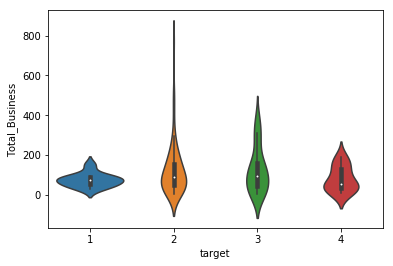

In [116]:
sns.violinplot(y='Total_Business',
       x='target', data = df[df['STATE']=='AZ'])

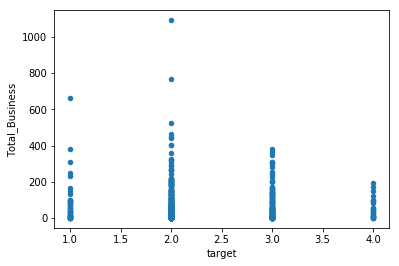

In [113]:
df.plot(kind='scatter',
       y='Total_Business',
       x='target')

Why sacle our variables?
 - We scale our variables to avoid unrealistic desribution of the yelp dollar sign, if left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.
---

# Model Preparation

In [42]:
X = df[['scaled_yelp_1', 'scaled_yelp_2','scaled_yelp_3', 'scaled_yelp_4']]
y = df['target']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Basedline Model

In [44]:
y.value_counts(normalize=True)

2    0.615385
3    0.250493
1    0.086785
4    0.047337
Name: target, dtype: float64

What is this ?
 - This is our baseline model. 0 to 4 represent the affluency, where 0 is the least affluenced and 4 is the most affluenced. The majority of our target fall under 2. Our base goal is to fit our data into several models and get the accuracy score that is higher than 61.53%. In that case, we will know that our model are performing better than the baseline.

## Machine Learning Model: Logistic Regression
---

In [62]:
params = {'C': [1.0, 2.0, 3.0, 4.0]}

In [63]:
start_time = time.time()
gs_lr = GridSearchCV(LogisticRegression(random_state=42,
                                        solver='lbfgs',
                                        multi_class='multinomial'),
                    param_grid=params,
                    return_train_score=False,
                    cv=3)
gs_lr.fit(X_train, y_train)
print(f'Time Spent: {round((time.time()-start_time)/60)} mins')

Time Spent: 0 mins


In [64]:
gs_lr.best_params_

{'C': 1.0}

In [65]:
gs_lr.score(X_train, y_train)

0.6105263157894737

In [53]:
gs_lr.score(X_test, y_test)

0.6299212598425197

In [105]:
np.logspace(-1, 1, 4)

array([ 0.1       ,  0.46415888,  2.15443469, 10.        ])

In [98]:
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression(solver='lbfgs', multi_class='multinomial')],
                 'classifier__C': np.logspace(0, 2, 4)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]},
                {'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors': [1, 3, 5, 7, 10]}]

In [99]:
gs = GridSearchCV(pipe, search_space, cv=5)
start_time = time.time()
best_model = gs.fit(X_train, y_train)
print(f'Time Spent: {round((time.time()-start_time)/60)} mins')

/Users/rexchang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rexchang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rexchang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rexchang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/rexchang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase t

Time Spent: 0 mins


/Users/rexchang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [100]:
gs.best_estimator_

Pipeline(memory=None,
     steps=[('classifier', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [101]:
gs.score(X_train, y_train)

0.6105263157894737

In [110]:
X_train.columns

Index(['scaled_yelp_1', 'scaled_yelp_2', 'scaled_yelp_3', 'scaled_yelp_4'], dtype='object')

In [109]:
gs.best_estimator_.named_steps.classifier.coef_

array([[-0.38813559,  0.11975241,  0.00292146,  0.26543309],
       [-0.51859039,  0.10490032,  0.36944461,  0.04431561],
       [ 0.88916   , -0.07500061, -0.3635139 , -0.45009754],
       [ 0.01756598, -0.14965211, -0.00885217,  0.14034885]])

In [111]:
gs.best_estimator_.named_steps.classifier.intercept_

array([-0.66347048,  1.39394473,  0.36991236, -1.10038662])